In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/tomato_leaf.zip

Streaming output truncated to the last 5000 lines.
  inflating: tomato/train/Tomato___Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG  
  inflating: tomato/train/Tomato___Target_Spot/00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0288164e-d6cf-4215-b593-7b581308a4cf___Com.G_TgS_FL 9777.JPG  
  inflating: tomato/train/Tomato___Target_Spot/03002b91-afe3-4c72-86b

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def count_images(directory):
  categories_count ={}
  categories = os.listdir(directory)
  for category in categories:
    category_dir = os.path.join(directory, category)
    image_count = len(os.listdir(category_dir))
    categories_count[category] = image_count
  return categories_count

In [ ]:
train_dir = 'tomato/train'
validation_dir = 'tomato/val'

In [ ]:
train_count = count_images(train_dir)
validation_count = count_images(validation_dir)

print("The train sample count: ", train_count)
print("The validation sample count: ", validation_count)

The train sample count:  {'Tomato___Target_Spot': 1000, 'Tomato___healthy': 1000, 'Tomato___Septoria_leaf_spot': 1000, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 1000, 'Tomato___Early_blight': 1000, 'Tomato___Spider_mites Two-spotted_spider_mite': 1000, 'Tomato___Leaf_Mold': 1000, 'Tomato___Bacterial_spot': 1000, 'Tomato___Tomato_mosaic_virus': 1000, 'Tomato___Late_blight': 1000}
The validation sample count:  {'Tomato___Target_Spot': 100, 'Tomato___healthy': 100, 'Tomato___Septoria_leaf_spot': 100, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 100, 'Tomato___Early_blight': 100, 'Tomato___Spider_mites Two-spotted_spider_mite': 100, 'Tomato___Leaf_Mold': 100, 'Tomato___Bacterial_spot': 100, 'Tomato___Tomato_mosaic_virus': 100, 'Tomato___Late_blight': 100}


In [ ]:
train_df = pd.DataFrame(list(train_count.items()), columns = ["Diseases", "Train Count"])
val_df = pd.DataFrame(list(validation_count.items()), columns = ["Diseases", "Validation Count"])

In [ ]:
df = pd.merge(train_df, val_df, on="Diseases")
df

,Diseases,Train Count,Validation Count
0,Tomato___Target_Spot,1000,100
1,Tomato___healthy,1000,100
2,Tomato___Septoria_leaf_spot,1000,100
3,Tomato___Tomato_Yellow_Leaf_Curl_Virus,1000,100
4,Tomato___Early_blight,1000,100
5,Tomato___Spider_mites Two-spotted_spider_mite,1000,100
6,Tomato___Leaf_Mold,1000,100
7,Tomato___Bacterial_spot,1000,100
8,Tomato___Tomato_mosaic_virus,1000,100
9,Tomato___Late_blight,1000,100


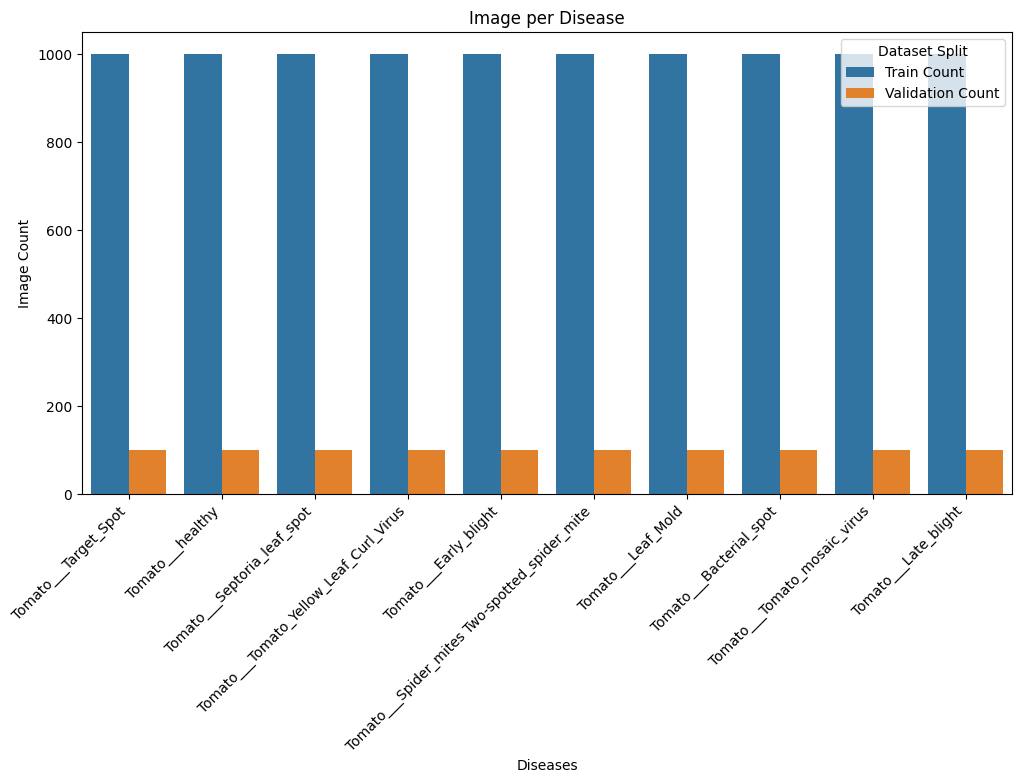

In [ ]:
df_melted = df.melt(
    id_vars='Diseases',
    value_vars=['Train Count','Validation Count'],
    var_name='Dataset Split',
    value_name='Image Count'
)
plt.figure(figsize=(12,6))
sns.barplot(data = df_melted, x = "Diseases", y = "Image Count", hue = "Dataset Split")
plt.xticks(rotation = 45, ha="right")
plt.xlabel("Diseases")
plt.ylabel("Image Count")
plt.title("Image per Disease")
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    validation_split = 0.2
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True,
    seed = 42
)

validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation',
    shuffle = True,
    seed = 42
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(10, activation = 'softmax')
])

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,268,426 (73.50 MB)

 Trainable params: 19,268,426 (73.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

history = model.fit(
    train_data,
    epochs = 20,
    validation_data = validation_data,
    callbacks = [early_stopping]
)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 103s 412ms/step - accuracy: 0.2262 - loss: 2.0920 - val_accuracy: 0.5035 - val_loss: 1.6104
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 99s 397ms/step - accuracy: 0.6547 - loss: 0.9795 - val_accuracy: 0.5700 - val_loss: 1.5492
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 100s 399ms/step - accuracy: 0.7523 - loss: 0.7327 - val_accuracy: 0.6430 - val_loss: 1.6251
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 102s 407ms/step - accuracy: 0.8034 - loss: 0.5856 - val_accuracy: 0.6585 - val_loss: 1.3381
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 100s 401ms/step - accuracy: 0.8165 - loss: 0.5462 - val_accuracy: 0.7480 - val_loss: 1.1674
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 99s 398ms/step - accuracy: 0.8401 - loss: 0.4630 - val_accuracy: 0.7670 - val_loss: 0.7149
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 100s 399ms/step - accuracy: 0.8652 - loss: 0.4036 - val_accuracy: 0.7600 - val_loss: 0.9140
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 102s 406ms/step - accuracy: 0.8717 - l

In [ ]:
train_loss, train_acc = model.evaluate(train_data)
print("The train accuracy: ", train_acc*100)

val_loss, val_acc = model.evaluate(validation_data)
print("The validation accuracy: ", val_acc*100)

250/250 ━━━━━━━━━━━━━━━━━━━━ 93s 373ms/step - accuracy: 0.9647 - loss: 0.1000
The train accuracy:  96.31249904632568
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9174 - loss: 0.2538
The validation accuracy:  91.10000133514404


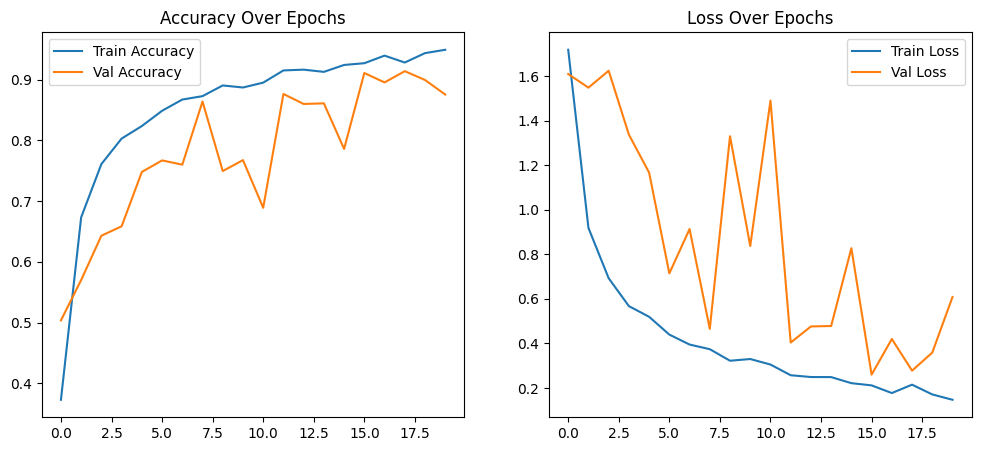

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train Accuracy")
plt.plot(epochs_range, val_acc, label="Val Accuracy")
plt.legend()
plt.title("Accuracy Over Epochs")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Val Loss")
plt.legend()
plt.title("Loss Over Epochs")

plt.show()
